# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [2]:
# Loading in required libraries: you will need pandas, seaborn and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Reading in the Nobel Prize data
nobel = pd.read_csv('../data/nobel.csv')

In [4]:
# Explore the data
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [6]:
# Are there missing values?
nobel.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

> 1. Most of the organisation information is missing, maybe most winner are individuals?  
2. Death infomation also has large number of missing entries. 
3. Is it possible for `birth_country` and `organization_country` be different? E.g looking at  
Jacobus Henricus van 't Hoff, he was born in Netherlands  and his organization is in Germany.  
Does organization informatiom refer to a place of work?


----

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [7]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
nobel.shape[0]

911

In [8]:
# Display the number of prizes won by male and female recipients.
nobel['sex'].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [12]:
# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().iloc[:10]

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

Which countries win most often?  
>  USA and UK have won the most prizes.  
Among the counries in the top 10, none of them is from the Southern Hemisphere.

---

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [13]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel.birth_country == 'United States of America'
nobel['decade'] = np.abs(1901 - nobel.year) // 10
# pro_usa_winners = number of usa winners in each decade / number of winners in each dece
prop_usa_winners = nobel[nobel.usa_born_winner == True]['decade'].value_counts().sort_index() / nobel['decade'].value_counts().sort_index()

# Display the proportions of USA born winners per decade
index = [str(x) + '-' + str(y) for x, y in zip(range(1901, 2022,10), range(1910, 2022,10))]
index[-1] = '2011-2016'
prop_usa_winners.index = index
prop_usa_winners

1901-1910    0.016129
1911-1920    0.075000
1921-1930    0.092593
1931-1940    0.254902
1941-1950    0.313725
1951-1960    0.285714
1961-1970    0.268293
1971-1980    0.339623
1981-1990    0.340206
1991-2000    0.367925
2001-2010    0.413223
2011-2016    0.295775
Name: decade, dtype: float64

---

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

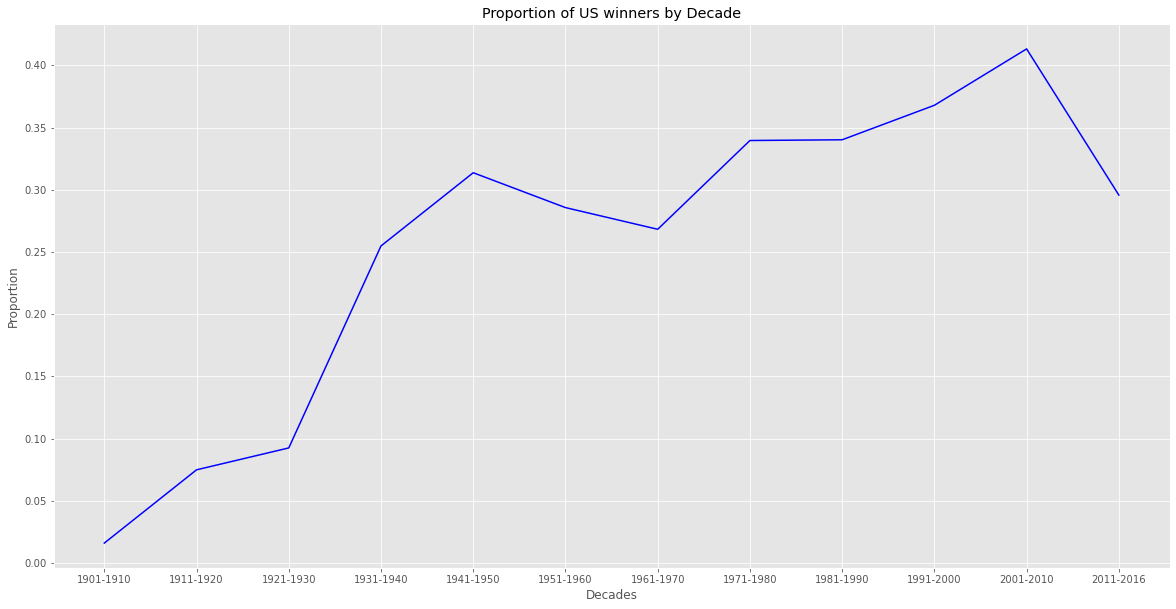

In [14]:
#using seaborn, plot the proportion of US winners by decade
plt.figure(figsize=(20,10))
sns.lineplot(x=prop_usa_winners.index, y=prop_usa_winners.values, color='b')
plt.xlabel('Decades')
plt.ylabel('Proportion')
plt.title('Proportion of US winners by Decade')
plt.show()

What can you conclude from the graph?
> The proportion of US winners has been increasing since the inception of the event, however  
it declined between 1961-170 then increasing again.

---

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

In [ ]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = ...
prop_female_winners = ...

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...



```
# This is formatted as code
```

 Interpret your plot here

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [ ]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [ ]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...




How many people have received 2 or more prizes?

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [ ]:
# Converting birth_date from String to datetime
nobel['birth_date'] = ...

# Calculating the age of Nobel Prize winners
nobel['age'] = ...

# What is the mean age of winners and it's standard devation? What is the median age?

## 9. Age differences between prize categories


In [ ]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...

# Plot the age of nobel candidates by decade and prize category

What can you conclude about the age at which people win different types of Nobel Prizes?

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

## Congratulations! You've reached the end of the challenge!